# # https://thecleverprogrammer.com/2022/02/22/online-payments-fraud-detection-with-machine-learning/

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv(r'C:\Users\akhil\Documents\NareshIT\Projects\Kaggle\Online payments fraud detection\frauddataset.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [166]:
data.isnull().sum()
#hence no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
nameDest_int      0
nameOrig_int      0
dtype: int64

In [39]:
data.type.value_counts()

type
1    2237500
2    2151495
3    1399284
4     532909
5      41432
Name: count, dtype: int64

In [41]:
type=data['type'].value_counts()
print(type)
transactions=type.index
print(transactions)
quantity=type.values

type
1    2237500
2    2151495
3    1399284
4     532909
5      41432
Name: count, dtype: int64
Index([1, 2, 3, 4, 5], dtype='int64', name='type')


In [43]:
import plotly.express as px
figure=px.pie(data,values=quantity,names=transactions,hole=0.5,title='Distribution of transaction type')

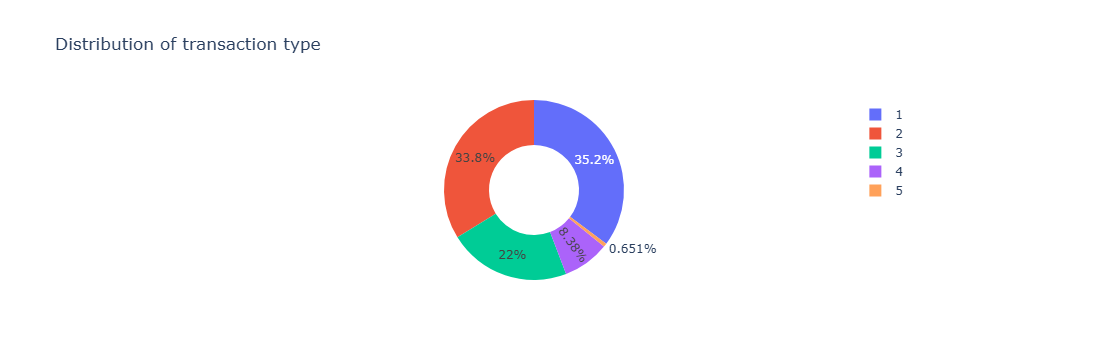

In [45]:
figure.show()

In [47]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column
label_enc = LabelEncoder()
data['isFraud'] = label_enc.fit_transform(data['isFraud'])

In [61]:
import pandas as pd

# Step 1: Extract numeric part from 'nameDest' and convert to int
data['nameDest_int'] = data['nameDest'].str.extract(r'(\d+)').astype(int)

# Step 2: Extract numeric part from 'nameDest' and convert to int
data['nameOrig_int'] = data['nameOrig'].str.extract(r'(\d+)').astype(int)


In [63]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int32  
 10  isFlaggedFraud  int64  
 11  nameDest_int    int32  
 12  nameOrig_int    int32  
dtypes: float64(5), int32(3), int64(3), object(2)
memory usage: 558.2+ MB
None


In [75]:
#creating new table by dropping 'nameOrig' and 'nameDest' columns
data_new=data[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud','nameDest_int','nameOrig_int']]
print(data_new.head(10))

   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     2   9839.64      170136.00       160296.36             0.0   
1     1     2   1864.28       21249.00        19384.72             0.0   
2     1     4    181.00         181.00            0.00             0.0   
3     1     1    181.00         181.00            0.00         21182.0   
4     1     2  11668.14       41554.00        29885.86             0.0   
5     1     2   7817.71       53860.00        46042.29             0.0   
6     1     2   7107.77      183195.00       176087.23             0.0   
7     1     2   7861.64      176087.23       168225.59             0.0   
8     1     2   4024.36        2671.00            0.00             0.0   
9     1     5   5337.77       41720.00        36382.23         41898.0   

   newbalanceDest  isFraud  isFlaggedFraud  nameDest_int  nameOrig_int  
0            0.00        1               0    1979787155    1231006815  
1            0.00        1             

In [77]:
#checking correlation
correlation=data_new.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
newbalanceOrig    0.008148
oldbalanceDest    0.005885
nameDest_int      0.000141
nameOrig_int     -0.000470
newbalanceDest   -0.000535
oldbalanceOrg    -0.010154
type             -0.016171
step             -0.031578
isFlaggedFraud   -0.044109
amount           -0.076688
Name: isFraud, dtype: float64


In [95]:
data_new["type"] = data_new["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data_new["isFraud"] = data_new["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data_new.head())

C:\Users\akhil\AppData\Local\Temp\ipykernel_21056\3039083048.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   NaN   9839.64       170136.0       160296.36             0.0   
1     1   NaN   1864.28        21249.0        19384.72             0.0   
2     1   NaN    181.00          181.0            0.00             0.0   
3     1   NaN    181.00          181.0            0.00         21182.0   
4     1   NaN  11668.14        41554.0        29885.86             0.0   

   newbalanceDest   isFraud  isFlaggedFraud  nameDest_int  nameOrig_int  
0             0.0     Fraud               0    1979787155    1231006815  
1             0.0     Fraud               0    2044282225    1666544295  
2             0.0  No Fraud               0     553264065    1305486145  
3             0.0  No Fraud               0      38997010     840083671  
4             0.0     Fraud               0    1230701703    2048537720  


C:\Users\akhil\AppData\Local\Temp\ipykernel_21056\3039083048.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
data_new.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int32
isFlaggedFraud      int64
nameDest_int        int32
nameOrig_int        int32
dtype: object

In [85]:
# building classification model to classify fraud/non-fraud transactions
# splitting
from sklearn.model_selection import train_test_split
x=np.array(data[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(data[['isFraud']])

In [87]:
print(x)
print(y)

[[2.00000000e+00 9.83964000e+03 1.70136000e+05 1.60296360e+05]
 [2.00000000e+00 1.86428000e+03 2.12490000e+04 1.93847200e+04]
 [4.00000000e+00 1.81000000e+02 1.81000000e+02 0.00000000e+00]
 ...
 [1.00000000e+00 6.31140928e+06 6.31140928e+06 0.00000000e+00]
 [4.00000000e+00 8.50002520e+05 8.50002520e+05 0.00000000e+00]
 [1.00000000e+00 8.50002520e+05 8.50002520e+05 0.00000000e+00]]
[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [153]:
# training the model --Decision Tree model
from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=42)
decision_tree_model=DecisionTreeClassifier(class_weight='balanced')
decision_tree_model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced')

In [155]:
# prediction
#features=type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[4,9000.60,9000.60,0.0]])
print(decision_tree_model.predict(features))

[0]


In [157]:
# prediction
#features=type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[3,29000.60,29000.60,0.0]])
print(model.predict(features))

[1]


In [159]:
# prediction
#features=type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[3,2000,19000.60,21000.60]])
print(decision_tree_model.predict(features))

[1]


In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Assuming y_test is the true labels and y_pred is the predicted labels
ypred = decision_tree_model.predict(xtest)

# Calculate the performance metrics
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

# Classification report includes Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(ytest, ypred))

# Confusion Matrix: to see the distribution of true positives, false positives, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ypred))

# ROC-AUC score (useful for imbalanced datasets)
roc_auc = roc_auc_score(ytest, decision_tree_model.predict_proba(xtest)[:,1])  # For probability-based models
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.9997391011878755

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       817
           1       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.95      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262


Confusion Matrix:
[[   723     94]
 [    72 635373]]
ROC-AUC: 0.9424158070087892


In [168]:
# # training the model --random forest  model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
y = y.ravel()  # or use y = y.flatten()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=42)
random_forest_model=RandomForestClassifier(class_weight='balanced',max_depth=10, n_estimators=50, n_jobs=-1,min_samples_split=10, min_samples_leaf=5)
random_forest_model.fit(xtrain,ytrain)

# prediction
#features=type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[4,9000.60,9000.60,0.0]])
print(random_forest_model.predict(features))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Assuming y_test is the true labels and y_pred is the predicted labels
ypred = random_forest_model.predict(xtest)

# Calculate the performance metrics
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

# Classification report includes Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(ytest, ypred))

# Confusion Matrix: to see the distribution of true positives, false positives, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ypred))

# ROC-AUC score (useful for imbalanced datasets)
roc_auc = roc_auc_score(ytest, random_forest_model.predict_proba(xtest)[:,1])  # For probability-based models
print(f"ROC-AUC: {roc_auc}")


[0]
Accuracy: 0.9933140750194103

Classification Report:
              precision    recall  f1-score   support

           0       0.16      1.00      0.28       817
           1       1.00      0.99      1.00    635445

    accuracy                           0.99    636262
   macro avg       0.58      1.00      0.64    636262
weighted avg       1.00      0.99      1.00    636262


Confusion Matrix:
[[   815      2]
 [  4252 631193]]
ROC-AUC: 0.9989572241767792


!pip install xgboost

In [170]:
# # training the model --xg boost model
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
y = y.ravel()  # or use y = y.flatten()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=42)
xgboost_model = xgb.XGBClassifier(
    scale_pos_weight=5,  # Adjusting for class imbalance (positive: negative class ratio)
    n_estimators=50,    # Number of boosting rounds (trees)
    max_depth=5,         # Depth of each tree
    learning_rate=0.1,   # Learning rate for optimization
    objective='binary:logistic',  # Since it's a binary classification problem
    use_label_encoder=False,  # Suppress label encoding warning
    eval_metric='auc'    # Evaluation metric
)
xgboost_model.fit(xtrain,ytrain)

# prediction
#features=type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[4,9000.60,9000.60,0.0]])
print(xgboost_model.predict(features))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Assuming y_test is the true labels and y_pred is the predicted labels
ypred = xgboost_model.predict(xtest)

# Calculate the performance metrics
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

# Classification report includes Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(ytest, ypred))

# Confusion Matrix: to see the distribution of true positives, false positives, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ypred))

# ROC-AUC score (useful for imbalanced datasets)
roc_auc = roc_auc_score(ytest, xgboost_model.predict_proba(xtest)[:,1])  # For probability-based models
print(f"ROC-AUC: {roc_auc}")


C:\Users\akhil\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[14:23:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[1]
Accuracy: 0.9991764398942574

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.36      0.53       817
           1       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       1.00      0.68      0.76    636262
weighted avg       1.00      1.00      1.00    636262


Confusion Matrix:
[[   295    522]
 [     2 635443]]
ROC-AUC: 0.9950198625732005


In [171]:
# # training the model --gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
y = y.ravel()  # or use y = y.flatten()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(xtrain,ytrain)

# prediction
#features=type,amount,oldbalanceOrg,newbalanceOrig]
features=np.array([[4,9000.60,9000.60,0.0]])
print(gradient_boosting_model.predict(features))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Assuming y_test is the true labels and y_pred is the predicted labels
ypred = gradient_boosting_model.predict(xtest)

# Calculate the performance metrics
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

# Classification report includes Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(ytest, ypred))

# Confusion Matrix: to see the distribution of true positives, false positives, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ypred))

# ROC-AUC score (useful for imbalanced datasets)
roc_auc = roc_auc_score(ytest,gradient_boosting_model.predict_proba(xtest)[:,1])  # For probability-based models
print(f"ROC-AUC: {roc_auc}")


[1]
Accuracy: 0.9987159377740616

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.00       817
           1       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.75      0.50      0.50    636262
weighted avg       1.00      1.00      1.00    636262


Confusion Matrix:
[[     1    816]
 [     1 635444]]
ROC-AUC: 0.5710289995889792


In [183]:
# picking the best model by comparing the metrics of each model
from sklearn.metrics import precision_score

from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
def evaluate_model(model,xtest,ytest,model_name='Model'):
    ypred=model.predict(xtest)
    ypred_prob=model.predict_proba(xtest)[:,1] if hasattr(model,'predict_proba') else None

    #metrics
    accuracy=accuracy_score(ytest,ypred)
    precision=precision_score(ytest,ypred)
    recall=recall_score(ytest,ypred)
    f1=f1_score(ytest,ypred)
    roc_auc=roc_auc_score(ytest,ypred) if ypred_prob is not None else 'N/A'

    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("-" * 50)

    return {'model':model_name,'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1,'roc_auc':roc_auc}
    
    

In [185]:
# testing all the models
results = []

# Evaluate Random Forest
results.append(evaluate_model(random_forest_model, xtest, ytest, model_name="Random Forest"))

# Evaluate Gradient Boosting
results.append(evaluate_model(gradient_boosting_model, xtest, ytest, model_name="Gradient Boosting"))

# Evaluate XGBoost
results.append(evaluate_model(xgboost_model, xtest, ytest, model_name="XGBoost"))

# Evaluate Decision Tree
results.append(evaluate_model(decision_tree_model, xtest, ytest, model_name="Decision Tree"))



Results for Random Forest:
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1 Score: 1.00
ROC-AUC: 0.9954303229110744

Confusion Matrix:
[[   815      2]
 [  4252 631193]]
--------------------------------------------------
Results for Gradient Boosting:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 0.500611208253879

Confusion Matrix:
[[     1    816]
 [     1 635444]]
--------------------------------------------------
Results for XGBoost:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 0.6805369819912342

Confusion Matrix:
[[   295    522]
 [     2 635443]]
--------------------------------------------------
Results for Decision Tree:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 0.9424158070087892

Confusion Matrix:
[[   723     94]
 [    72 635373]]
--------------------------------------------------


In [189]:
# comparing the results
import pandas as pd
results_df=pd.DataFrame(results)
print(results_df)

               model  accuracy  precision    recall        f1   roc_auc
0      Random Forest  0.993314   0.999997  0.993309  0.996642  0.995430
1  Gradient Boosting  0.998716   0.998718  0.999998  0.999358  0.500611
2            XGBoost  0.999176   0.999179  0.999997  0.999588  0.680537
3      Decision Tree  0.999739   0.999852  0.999887  0.999869  0.942416


In [191]:
#picking the best model
best_model = results_df.sort_values(by="f1", ascending=False).iloc[0]
print(f"Best Model: {best_model['model']} with F1-Score: {best_model['f1']:.2f}")

Best Model: Decision Tree with F1-Score: 1.00


picking decision tree model because all metrics are 1 roc-auc is highest for decision tree